In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe data_science_salaries_raw.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Processing file 1DHBdvECi_-cQtiJ1FZl4v_JfLgAMrauE world_happiness_2015.csv
Processing file 10lU_ehl4CmZqXZ8Ow4tz_G4zHvB9kkwV world_happiness_2019.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 18.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe
To: /content/da

# Lecture 15, CMPSC 5A, S25

Tue 05/20/2025, Week 8

Google Colab versions of lecture notebooks can be found in this folder:
* <https://drive.google.com/drive/folders/1jS1Fa0BpGUVaijXwIYX0I21Un6XOGQM-?usp=sharing>

Note that the Google Colab version will have any updates made during class, while the copy on Jupyter Hub may not.


# Midterm Project

Any questions about the midterm project?

* For reference, here's a link to the [General Instructions, CS5A S25 Midterm](https://docs.google.com/document/d/1gYMuXukOTtJkEthxUeHmWuA1Qn9BtIYkSJa37Gb524E/edit?usp=sharing)



# The rest of the course

| Week | Tue | Wed | Thu | Fri |
|-|-|-|-|-|
| 8 | | 05/21 Start lab05 (required) | | |
| 8 | | 05/21 Start worksheet7 (optional) | | |
| 9 | 05/27 lab05 due (required) | start final projects* (required) | |
| 9 | 05/27 worksheet7 due (optional) | (*earlier if available) | |
| 9 |                                 | start worksheet8 (optional) | |
| 10 | 06/03 worksheet8 due (optional) | *(time to work on final)* | final projects (notebook due) | final projects (slides, video due) |




## ic24 Participation Assignment

TODO: Create this and link to it on Gradescope

Just one today, on Gradescope as [ic24]()




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Chapter 9: Randomness](https://inferentialthinking.com/chapters/09/Randomness.html)

New Reading for Today (week 8, 05/20):

* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)
* [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html)

*New Reading for next Thursday (week 8, 05/22):*

* [Chapter 10 (Sampling and Empirical Distributions)](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)

*New Reading for Tuesday (week 9, 05/27):*

* [Chapter 11 (Testing Hypotheses, including p-values)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html) (**Needed for final project**)

New Reading for Thursday (week 9, 05/29):
* [Chapter 12 (Comparing Two Samples, including A/B testing)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html) (**Needed for final project**)

Unless I update you otherwise, this is all the reading for the quarter.



# Midterm Announcements: Limited Extension to Check your work

I'm announcing a *limited* extension to the deadline for the midterm notebook, slides and video.

The purpose of this extension is one thing, and one thing only:
* We are clarifying one part of the instructions/rubric
* We are giving you a chance, *assuming you were already on track for the original deadline* to check your work.
* This is *not* extra time to work on the project, so no further extensions will be given.

(I do note that every group submitted the notebook already, so thanks for that!)

Here's the clarification:

* The old rubric had an item on it where you would lose points for using "python and data science concepts not covered in class".
* I understand the *intent* of that old rubric item; it was to penalize students that just blindly copy code from an AI result or advice from an advanced student *without understanding*.
* BUT: I objected to the wording of this.  I am *fine* with:
  * Students that use material not covered in class *when it's from an AI prompt, and they have shown their prompt, and explained in the workflow*
  * Students that use material not covered in class *when they read ahead in the textbook, or used other online materials to learn something useful*, and they are able to explain what they did and why, and show that they *understand* their code (in the workflow description).

SO: The new rubric item is:
* Used concepts not covered in class *without adequate explanation demonstrating understanding* through some combination of including the AI prompts and detailed workflow explanations.

## What *you need to do*:

Go over your group's notebook and be sure that for every code cell:
* If you used AI, you included the prompt.
* You have explanations in the workflow cell about how you got the answers you got
* If you used things not covered in class, be *extra* sure that you did both of these two things.

For the notebook, if you already submitted, and the URL is staying the same, you do NOT need to resubmit.  Just know that we won't start grading until after the deadline Wednesday night at midnight.

I've also extended the deadline for the slides and video to Thursday so that you'll have time to do this final check.



# An introduction to p values

Last time we looked at the [World Happiness Dataset from Kaggle.com](https://www.kaggle.com/datasets/unsdsn/world-happiness) for 2015 and found some interesting correlations.  

Here is a review of what we found:

First, we loaded the dataset:





In [ ]:
happiness_raw = Table.read_table(DATA_FOLDER + "world_happiness_2015.csv")
happiness_raw

Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Then we relabelled some colums to make it easier to work with:

In [ ]:
happiness = happiness_raw \
  .relabel("Happiness Rank","Rank")  \
  .relabel("Happiness Score", "Score") \
  .relabel("Standard Error", "Error") \
  .relabel("Economy (GDP per Capita)", "Economy") \
  .relabel("Health (Life Expectancy)", "Health") \
  .relabel("Trust (Government Corruption)", "Trust") \
  .relabel("Dystopia Residual", "Dystopia")
happiness

Country,Region,Rank,Score,Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We made some scatter plots (I'm not showing all of them now; just three of them to remind you):

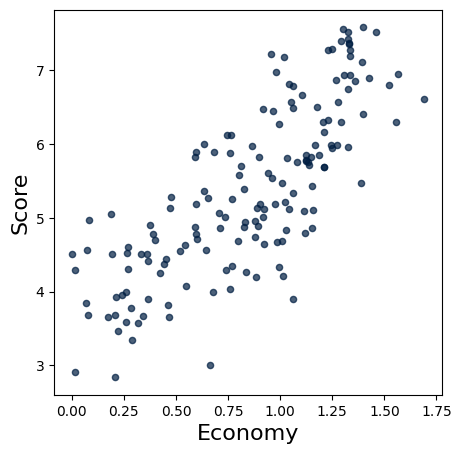

In [ ]:
# Uncomment  "%matplotlib inline" and run it again if graphs are not showing up;
# Rerun the cell if you get multiple graphs stacked up

%matplotlib inline
happiness.scatter("Economy","Score")

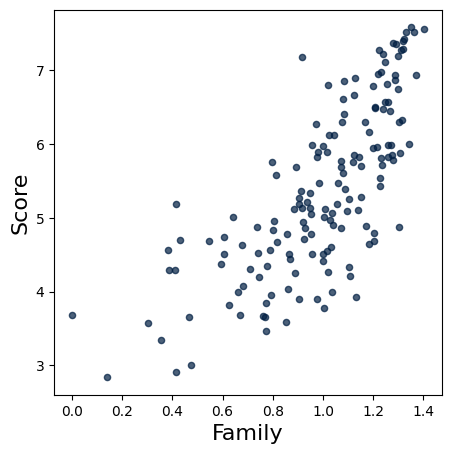

In [ ]:
happiness.scatter("Family","Score")

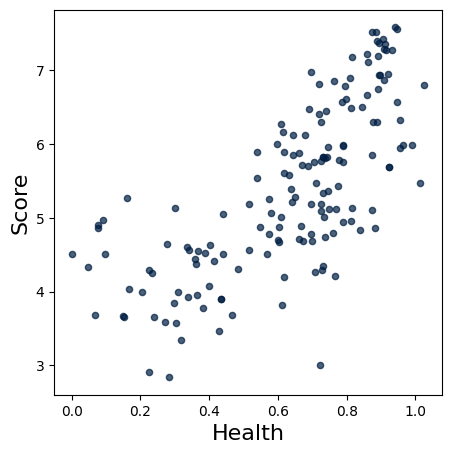

In [ ]:
happiness.scatter("Health","Score")

We talked about how these all seem to be vaguely correlated from a visual inspection.  But we wanted to see if we could quantify that.

And for that, we used the *Pearson Correlation Coefficient*.   

We first did this for two variables:


In [ ]:
economy = np.array(happiness.column("Economy"))
score = np.array(happiness.column("Score"))
economy_vs_score = np.corrcoef(economy, score)
economy_vs_score

array([[ 1.        ,  0.78096553],
       [ 0.78096553,  1.        ]])

And we saw that we get the output back as a two by two matrix.

We then did it for three variables:

In [ ]:
economy = np.array(happiness.column("Economy"))
family = np.array(happiness.column("Family"))
score = np.array(happiness.column("Score"))

three_data_sets = np.array([economy, family, score])
three_way_correlation = np.corrcoef(three_data_sets)
three_way_correlation

array([[ 1.        ,  0.64529939,  0.78096553],
       [ 0.64529939,  1.        ,  0.7406052 ],
       [ 0.78096553,  0.7406052 ,  1.        ]])


And as a reminder, this is how we interpret the data:

|         | economy         | family         | score          |
|---------|-----------------|----------------|----------------|
| economy | economy,economy | economy,family | economy, score |
| family  | family,economy  | family,family  | family, score  |
| score   | quality,economy | score,family   | score, score   |


We can extended it to all of our variables:

In [ ]:
economy = np.array(happiness.column("Economy"))
family = np.array(happiness.column("Family"))
score = np.array(happiness.column("Score"))
health = np.array(happiness.column("Health"))
freedom = np.array(happiness.column("Freedom"))
trust = np.array(happiness.column("Trust"))
generositty = np.array(happiness.column("Generosity"))

data_all = np.array([economy, family, score, health, freedom, trust, generositty])
all_ways_correlation = np.corrcoef(data_all)
all_ways_correlation

array([[ 1.        ,  0.64529939,  0.78096553,  0.816478  ,  0.37029971,
         0.3078852 , -0.01046544],
       [ 0.64529939,  1.        ,  0.7406052 ,  0.53110399,  0.44151821,
         0.20560511,  0.08751324],
       [ 0.78096553,  0.7406052 ,  1.        ,  0.7241996 ,  0.5682109 ,
         0.39519858,  0.18031853],
       [ 0.816478  ,  0.53110399,  0.7241996 ,  1.        ,  0.36047653,
         0.24833468,  0.10833522],
       [ 0.37029971,  0.44151821,  0.5682109 ,  0.36047653,  1.        ,
         0.49352352,  0.37391613],
       [ 0.3078852 ,  0.20560511,  0.39519858,  0.24833468,  0.49352352,
         1.        ,  0.2761227 ],
       [-0.01046544,  0.08751324,  0.18031853,  0.10833522,  0.37391613,
         0.2761227 ,  1.        ]])

But the output was confusing to read.  So we wrote a function to make things more convenient:

It's called `calculate_correlation_table` and takes two arguments:
* A table
* A list of column names (as strings)

It returns two results:
* The matrix of Pearson Correlation Coefficients
* A table of the results, sorted in descending order by correlation.

It doesn't include correlations of columns with themselves, and it only includes each correlation once (i.e. if (a,b) is included, (b,a) is ommited.)

In [ ]:
def calculate_correlation_table(table, variable_names):

  # First make a list of all the data we are going to pass to np.corrcoef

  data_list = []
  for name in variable_names:
    data_list.append(np.array(table.column(name)))
  data_array = np.array(data_list)

  # Calculate the Pearson Coefficient matrix
  all_ways_correlation = np.corrcoef(data_array)

  # Make a list of dictionaries that we will use to construct a table
  correlation_table_rows = [] # start with empty list
  n = len(variable_names)  # n is the number of variables
  for i in range(n):       # iterate 0 .. n-1
    for j in range(i):     # iterate 0 to i (avoids listing a,b and b,a)
      if i == j:           # don't include self correlation
        continue           # continue "skips" to next iteration of the loop
      # construct one row of the table as a Python dictionary
      this_row = {
          "variable1": variable_names[i],
          "variable2": variable_names[j],
          "correlation": all_ways_correlation[i][j]
      }
      correlation_table_rows.append(this_row) # add to the list

  # Create a table from the list of dictionaries and sort
  correlation_table = Table.from_records(correlation_table_rows) \
    .sort("correlation",descending=True)
  # return both results
  return all_ways_correlation, correlation_table


And we tried it on the entire dataset:

In [ ]:
matrix_all, table_all = calculate_correlation_table(happiness, ["Economy", "Family", "Health", "Freedom", "Trust", "Generosity", "Score"])

In [ ]:
table_all.show()

correlation,variable1,variable2
0.816478,Health,Economy
0.780966,Score,Economy
0.740605,Score,Family
0.7242,Score,Health
0.645299,Family,Economy
0.568211,Score,Freedom
0.531104,Health,Family
0.493524,Trust,Freedom
0.441518,Freedom,Family
0.395199,Score,Trust


## Are these correlations significant?

There are some strong correlations here.  But are they *statistially significant*?

When we say *statistically signficant*, we mean something very precise:

* The probability that we are making a Type 1 Error is small (e.g. less than 5% or less than 1%)

## What do we mean by Type 1 error?

The fields of Statistics has defined two types of errors:

* Type 1 Errors: You claim something is happening, but it really isn't.  
  
  For example in the case of a Pearson Correlation Coefficient, we might be claiming, based on some data, and a high coefficient that two variables are correlated, but in fact, this is just a freak accident.  
  
  For example, if we are studying a link between smoking and lung cancer,
  and we pull 100 random medical records, there is some probability that just by *random chance*, nearly every single record of a smoker we pull is also someone that had lung cancer.
  
  That is, there are patients that had lung cancer and were not smokers, and there are smokers that never developed lung cancer, but our random selection process came up with very few of these; much fewer than exist in reality.

  In this circumstance, our study would *overestimate* the correlation between lung cancer and smoking.  This would be a type 1 error.
  

* Type 2 Errors: Something is really there; but we miss it.

  For example, suppose in our study, by random chance we hardly every pull a record of someone that's a smoker and had lung cancer.  The number we pull is much, much smaller than the number you'd expect, and it's just due to random chance.

  So our study would *underestimate* the correlation bewteen lung cancer and smoking.

For the Pearson Coefficient r, the tells us how likely it is that we'd  a correlation at least as strong as the one you got *purely by chance*, if the *true* correlation were zero.

## Calculating the p values

There isn't a direct way to calculate p values for Pearson coefficients in the Data 8 datascience module or in `numpy`, but we can use another module called `scipy` to do it.

Here's an example. Let's return first to our first calculation for Pearson's $r$:


In [ ]:
economy = np.array(happiness.column("Economy"))
score = np.array(happiness.column("Score"))
economy_vs_score = np.corrcoef(economy, score)
economy_vs_score

array([[ 1.        ,  0.78096553],
       [ 0.78096553,  1.        ]])

First we import scipy.stats

In [ ]:
import scipy.stats

Here's how to calculate both r and the p values using `scipy.stats.pearson`

In [ ]:
economy = np.array(happiness.column("Economy"))
score = np.array(happiness.column("Score"))
r, p_value = scipy.stats.pearsonr(economy, score)
print("r:", r)
print("p value:", p_value)

r: 0.780965526866
p value: 1.0505384132e-33


That's a *very* small p value.  The `e-33` here means that this is expressed in scientific notation as $ 1.0505384132 \times 10^{-33}$.

The small p value is a result of at least two factors:
* the strength of the coorelation
* the relatively large number of items in the dataset

If we had far fewer items in the dataset, or a weaker correlation, we might not get nearly as high a p-value.

Let's explore that by taking one of the weaker correlations from our dataset:

```
0.180319 	Score 	Generosity
```

In [ ]:
score = np.array(happiness.column("Score"))
generosity = np.array(happiness.column("Generosity"))
r, p_value = scipy.stats.pearsonr(score, generosity)
print("r:", r)
print("p value:", p_value)

r: 0.180318526697
p value: 0.0233787159128


That's a much more common p value.  Still, the usual standard for "statistical significance" is a p value < 0.05.   The correlation here is weak, but statistically significant.

One thing to take from this is that just because something is *statistically signficant* does not mean it is *significant*.  You can make anything *statistically* significant if the number of items in the data set is large enough!

Let's try something else.  Let's take a few  samples of our dataset of different sizes and see what p values we get for the economy vs happiness score calculation; and let's do this twenty times.

As you can see, for small sample sizes, both the p values and the calculated Pearson coefficients vary a lot!

In [ ]:
for i in range(20):
  sample_5 = happiness.sample(5)
  economy = np.array(sample_5.column("Economy"))
  score = np.array(sample_5.column("Score"))
  r, p_value = scipy.stats.pearsonr(economy, score)
  print(f"i={i:2} r={r:6.3f} p value={p_value:6.3f}")


i= 0 r= 0.890 p value= 0.043
i= 1 r= 0.813 p value= 0.094
i= 2 r= 0.968 p value= 0.007
i= 3 r= 0.872 p value= 0.054
i= 4 r= 0.986 p value= 0.002
i= 5 r= 0.989 p value= 0.001
i= 6 r= 0.288 p value= 0.639
i= 7 r= 0.877 p value= 0.051
i= 8 r= 0.980 p value= 0.003
i= 9 r= 0.844 p value= 0.072
i=10 r= 0.866 p value= 0.057
i=11 r= 0.933 p value= 0.021
i=12 r= 0.913 p value= 0.030
i=13 r= 0.714 p value= 0.175
i=14 r= 0.361 p value= 0.550
i=15 r= 0.798 p value= 0.106
i=16 r= 0.462 p value= 0.434
i=17 r= 0.773 p value= 0.125
i=18 r= 0.785 p value= 0.116
i=19 r= 0.890 p value= 0.043


Let's try this with a larger sample size; 20 instead of 5.  You can see that a larger sample size gives us a much lower p value; and in the cases where the p values is large, it's associated with the fact that we ended up (randomly) choosing a randoms sample where the correlation was much weaker.

In [ ]:
for i in range(20):
  sample_5 = happiness.sample(20)
  economy = np.array(sample_5.column("Economy"))
  score = np.array(sample_5.column("Score"))
  r, p_value = scipy.stats.pearsonr(economy, score)
  print(f"i={i:2} r={r:6.3f} p value={p_value:6.3f}")


i= 0 r= 0.895 p value= 0.000
i= 1 r= 0.862 p value= 0.000
i= 2 r= 0.695 p value= 0.001
i= 3 r= 0.858 p value= 0.000
i= 4 r= 0.885 p value= 0.000
i= 5 r= 0.800 p value= 0.000
i= 6 r= 0.440 p value= 0.052
i= 7 r= 0.819 p value= 0.000
i= 8 r= 0.642 p value= 0.002
i= 9 r= 0.834 p value= 0.000
i=10 r= 0.820 p value= 0.000
i=11 r= 0.760 p value= 0.000
i=12 r= 0.687 p value= 0.001
i=13 r= 0.758 p value= 0.000
i=14 r= 0.739 p value= 0.000
i=15 r= 0.679 p value= 0.001
i=16 r= 0.773 p value= 0.000
i=17 r= 0.848 p value= 0.000
i=18 r= 0.808 p value= 0.000
i=19 r= 0.891 p value= 0.000


Let's now incorporate this into our function that makes a table of correlations:

In [ ]:
def calculate_correlation_table_with_p_values(table, variable_names):

  # First make a list of all the data we are going to pass to np.corrcoef

  data_dict = {}
  for name in variable_names:
    data_dict[name] = np.array(table.column(name))

  # Make a list of dictionaries that we will use to construct a table
  correlation_table_rows = [] # start with empty list
  n = len(variable_names)  # n is the number of variables
  for i in range(n):       # iterate 0 .. n-1
    for j in range(i):     # iterate 0 to i (avoids listing a,b and b,a)
      if i == j:           # don't include self correlation
        continue           # continue "skips" to next iteration of the loop
      # construct one row of the table as a Python dictionary

      r, p_value = scipy.stats.pearsonr(data_dict[variable_names[i]], data_dict[variable_names[j]])

      this_row = {
          "variable1": variable_names[i],
          "variable2": variable_names[j],
          "correlation": r,
          "p value": p_value
      }
      correlation_table_rows.append(this_row) # add to the list

  # Create a table from the list of dictionaries and sort
  correlation_table = Table.from_records(correlation_table_rows) \
    .sort("correlation",descending=True)
  return  correlation_table


In [ ]:
table_with_p_values = calculate_correlation_table_with_p_values(happiness, ["Economy", "Family", "Health", "Freedom", "Trust", "Generosity", "Score"])
table_with_p_values.show()

correlation,p value,variable1,variable2
0.816478,4.77527e-39,Health,Economy
0.780966,1.05054e-33,Score,Economy
0.740605,9.91885e-29,Score,Family
0.7242,5.7889e-27,Score,Health
0.645299,5.59094e-20,Family,Economy
0.568211,6.87581e-15,Score,Freedom
0.531104,7.03234e-13,Health,Family
0.493524,4.43998e-11,Trust,Freedom
0.441518,6.36367e-09,Freedom,Family
0.395199,2.7638e-07,Score,Trust


As you can see from this table, the p values are :
* statistically significant at the $p<0.01$ level for all but the last four rows
* statistically significant at the $p<0.05$ for (Score,Generosity)
* not statistically signficant for the last three rows
